## The San Francisco Chronicle

In this assignment, you'll scrape text from [The San Francisco Chronicle](https://www.sfchronicle.com/) newspaper and then analyze the text.

The Chronicle is organized by category into article lists. For example, there's a [Local](https://www.sfchronicle.com/local/) list, [Sports](https://www.sfchronicle.com/sports/) list, and [Food](https://www.sfchronicle.com/food/) list.

The goal of exercises 1.1 - 1.3 is to scrape articles from the Chronicle for analysis in exercise 1.4.

__Exercise 1.1.__ Write a function that extracts all of the links to articles in a Chronicle article list. The function should:

* Have a parameter `url` for the URL of the article list.

* Return a list of article URLs (each URL should be a string).

Test your function on 2-3 different categories to make sure it works.

Hints:

* Be polite and save time by setting up [requests_cache](https://pypi.python.org/pypi/requests-cache) before you write your function.

* You can use any of the XML/HTML parsing packages mentioned in class. Choose one and use it throughout the entire assignment.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp 
import seaborn as sns
%matplotlib inline
import lxml.html as lx
import requests
import requests_cache
import nltk
import nltk.corpus
import time
import re
from nltk.corpus import wordnet
requests_cache.install_cache("my_cache_hw4")

In [2]:
def chronicle_search(url):
    """takes in chronicle link and outputs article links from there. returns a list of strings"""
    response = requests.get(url)
    time.sleep(1)
    response.raise_for_status()
    html = lx.fromstring(response.text)
    html.make_links_absolute(url)
    dup_links = html.xpath("//a[contains(@href,'/article/')]/@href")
    #subsetting for those that have article in <a> and returning href attribute
    links = list(set(dup_links)) #remove duplicates
    return links

In [3]:
links = chronicle_search("https://www.sfchronicle.com/local/")
links[0:5] #first five links in local 

['https://www.sfchronicle.com/crime/article/Vallejo-couple-indicted-for-allegedly-making-13634690.php',
 'https://www.sfchronicle.com/crime/article/Couple-mugged-of-McChicken-sandwich-outside-SF-13634521.php',
 'https://www.sfchronicle.com/bayarea/article/As-workers-and-students-struggle-food-banks-are-13458905.php',
 'https://www.sfchronicle.com/bayarea/philmatier/article/Oakland-Raiders-Coliseum-close-to-deal-to-keep-13628183.php',
 'https://www.sfchronicle.com/bayarea/article/Season-of-Sharing-She-inherited-a-house-then-13436015.php']

In [4]:
links = chronicle_search("https://www.sfchronicle.com/sports/")
links[0:5]

['https://www.sfchronicle.com/sports/article/Keelan-Doss-receiver-from-UC-Davis-and-Alameda-13635165.php',
 'https://www.sfchronicle.com/sharks/article/Joe-Thornton-s-hat-trick-not-enough-for-Sharks-13626477.php',
 'https://www.sfchronicle.com/sports/article/Don-t-be-deceived-by-11-14-record-of-Sacred-13626119.php',
 'https://www.sfchronicle.com/raiders/article/Raiders-announce-five-hires-to-coaching-staff-13617792.php',
 'https://www.sfchronicle.com/collegesports/article/Stanford-men-seek-tie-breaking-sweep-of-Arizona-13628471.php']

In [5]:
links = chronicle_search("https://www.sfchronicle.com/food/")
links[0:5]

['https://www.sfchronicle.com/food/article/Late-season-crops-extend-joys-of-summertime-11952995.php',
 'https://www.sfchronicle.com/recipes/article/A-Brown-Kitchen-How-I-faced-my-fear-and-used-a-13541372.php',
 'https://www.sfchronicle.com/recipes/article/Recipe-How-to-make-RT-Rotisserie-s-Brussels-13450256.php',
 'https://www.sfchronicle.com/restaurants/article/2018-Bar-Stars-13447581.php',
 'https://www.sfchronicle.com/food/article/The-Brixton-to-open-SoMa-offshoot-in-former-13614187.php']

__Exercise 1.2.__ Write a function that extracts data from a Chronicle article. The function should:

* Have a parameter `url` for the URL of the article.

* Return a dictionary with keys for:
    + `url`: The URL of the article.
    + `title`: The title of the article.
    + `text`: The complete text of the article.
    + `author`: The author's name (if available) or a suitable missing value.
    + `date`: The date and time the article was published.
    + `date_updated`: The date and time the article was last updated (if available) or a suitable missing value.

For example, for [this article](https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php) your function should return a dictionary with the form:
```js
{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book...',
 'author': 'Pam Peirce',
 'date': '2019-02-01T18:02:33+00:00',
 'date_updated': '2019-02-01T18:12:53+00:00'}
```
The value of the `text` field is omitted here to save space. Your function should return the full text in the `text` field.

Hints:

* Many parsing packages allow you to delete elements from an HTML document. Deleting elements is one way to avoid extracting unwanted tags.
* You can union multiple XPath paths with `|`.

In [6]:
#single article. extracts url, title, text, author, date, date_updated
#https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php
def article_data(url):
    """takes in a single article url string and outputs url, title, text, author, date,
    and date_updated in a dictionary if applicable"""
    response = requests.get(url)
    html = lx.fromstring(response.text)
    
    #title
    title = html.xpath("//h1[@itemprop = 'headline' and @class = 'header-title']/text() | //meta[contains(@property, 'title')]/@content")
    if title == []:
        title = None
    else: 
        title = list(set(title))[0]
    #two title 'or' conditions and filtered duplicates
    
    #text
    text = html.xpath("//section[contains(@class,'body')]//p//text()[not(ancestor::em)] | //div[contains(@class, 'body')]//p//text()")
    if text == []:
        text = None
    else: 
         text = ' '.join(text)
    #two text 'or' conditions and joined text in one string
    
    #author
    author = html.xpath("//meta[contains(@property, 'author')]/@content")
    if author == []:
        author = html.xpath("//div[contains(@class, 'author')]/span[contains(@class, 'header-byline')]/text()")
        if author == []:
            author = html.xpath("//meta[contains(@name, 'author')]/@content") 
            if author == []:
                author = None
            else:
                author = author[0].strip()   
                author = author.strip("By ")
        else:
            author = author[0].strip()   
            author = author.strip("By ")
    else:
        author = list(set(author))[0]
    #three author conditions. stripping white space and by in the same way when necessary
    #or operating within xpath doesn't work for this situation in specific. 
    
    #date
    date = html.xpath("//time[@itemprop = 'datePublished']/@datetime | //meta[contains(@name, 'published')]/@content")
    if date == []:
        date = None
    else:
        date = list(set(date))[0]
    #two date 'or' conditions and filtered duplicates
    
    #date updated
    date_updated = html.xpath("//time[@itemprop = 'dateModified']/@datetime | //meta[contains(@name, 'modified')]/@content")
    if date_updated == []:
        date_updated = None
    else:
        date_updated = list(set(date_updated))[0]
    #two date updated 'or' conditions and filtered duplicates
    
    return {"url": url, "title": title, "text": text, "author": author, "date": date, "date_updated": date_updated}
    #returns dictionary with required keys

In [7]:
article_data("https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php")
#example article

{'url': 'https://www.sfchronicle.com/homeandgarden/article/Gardenlust-looks-at-best-21st-century-13580871.php',
 'title': '‘Gardenlust’ looks at best 21st century gardens in the world',
 'text': 'The book “Gardenlust: A Botanical Tour of the World’s Best New Gardens” by Christopher Woods (Timber Press, 416 pages, $40) shows you gardens from around the globe, including some surprising places such as Oman, Singapore and the island of Nevis in the West Indies, all of them created in the past 20 years. Fifty gardens or designers are featured. The sites are all engaging; some are breathtaking. Woods, the author and major photographer of the book, began his career as a gardener at Kew Gardens in London. He then worked at a number of public gardens in England and the U.S., including 20 years as director and chief designer of Chanticleer Arboretum in Pennsylvania. (I have been to Chanticleer and have seen the Ruins Garden he created there from the stone and slate ruins of the home of the origi

__Exercise 1.3.__ Use your functions from exercises 1.1 and 1.2 to get data frames of articles for the "Biz+Tech" category as well as two other categories of your choosing (except for "Vault: Archive", "Podcasts", and "In Depth").

Add a column to each that indicates the category, then combine them into one big data frame. Clean up the data, stripping excess whitespace and converting columns to appropriate dtypes.

The `text` column of this data frame will be your corpus for natural language processing in exercise 1.4.

In [8]:
#chronicle_search(url)
#article_data(article)
def article_df(url):
    """takes in a url string and ouputs data regarding url, title, text,
    date_updated, date, and author in a data frame if applicable for all articles within url"""
    listing_numb = []
    article = chronicle_search(url) 
    for i in list(range(0,len(article))):
        listing_numb = listing_numb + [article_data(article[i])]
    return pd.DataFrame(listing_numb)

In [9]:
#add categories

business_df = article_df("https://www.sfchronicle.com/business/")
business_df["category"] = "business"

local_df = article_df("https://www.sfchronicle.com/local/")
local_df["category"] = "local"

sports_df = article_df("https://www.sfchronicle.com/sports/")
sports_df["category"] = "sports"

frames = [business_df, local_df, sports_df]
final_df = pd.concat(frames)

#merged df with business, local, and sports

In [10]:
##maintenance## 
final_df = final_df.reset_index()
final_df = final_df.drop(columns = ["index"])
#reset index

for i in list(range(0,len(final_df))):
    final_df["author"][i] = final_df["author"][i].replace(", AP Business Writer", '')
    final_df["date"] = final_df["date"][i].split("T", 1)[0]
    final_df["date_updated"] = final_df["date_updated"][i].split("T", 1)[0]
#replace business writer tag and isolate dates to year-month-day
    
#making date types 
final_df["date"] = pd.to_datetime(final_df["date"])
final_df["date_updated"] = pd.to_datetime(final_df["date_updated"])

#final_df.dtypes
final_df

,author,date,date_updated,text,title,url,category
0,Dominic Fracassa,2019-02-15,2019-02-15,"More than 250,000 San Francisco homes and busi...",CleanPowerSF tripling households served with m...,https://www.sfchronicle.com/bayarea/article/Cl...,business
1,JOE McDONALD,2019-02-15,2019-02-15,BEIJING (AP) — Asian stock markets were little...,Asian stocks change little ahead of more US-Ch...,https://www.sfchronicle.com/news/us/article/US...,business
2,Kathleen Pender,2019-02-15,2019-02-15,Gov. Gavin Newsom has proposed spending $50 mi...,Newsom wants to expand programs that open a sa...,https://www.sfchronicle.com/business/networth/...,business
3,Mike Isaac and Kate Conger,2019-02-15,2019-02-15,In a rush to beat its rival Uber to the public...,Lyft sets early April for its IPO,https://www.sfchronicle.com/business/article/L...,business
4,Shwanika Narayan,2019-02-15,2019-02-15,One of San Francisco’s last traditional men’s ...,The Hound Gentlemen's Clothiers finds buyer on...,https://www.sfchronicle.com/business/article/T...,business
5,Matthias Gafni,2019-02-15,2019-02-15,Following orders from a federal judge who has ...,PG&E responds to judge: 'Perfect compliance' i...,https://www.sfchronicle.com/business/article/P...,business
6,YURI KAGEYAMA,2019-02-15,2019-02-15,TOKYO (AP) — Asian shares were mostly lower Fr...,Asian shares mostly lower as investors watch t...,https://www.sfchronicle.com/news/world/article...,business
7,Michael Liedtke and Anick Jesdanun,2019-02-15,2019-02-15,Samsung unveiled a highly anticipated smartpho...,"Samsung folding phone can be yours for $2,000",https://www.sfchronicle.com/business/article/S...,business
8,Carolyn Said,2019-02-15,2019-02-15,"If anyone knew the ropes about Airbnb rentals,...","Long, winding road to SF’s get-tough registrat...",https://www.sfchronicle.com/business/article/L...,business
9,Esther Mobley,2019-02-15,2019-02-15,"Champagne Louis Roederer, the French company f...","Merry Edwards Winery, Sonoma Pinot Noir icon, ...",https://www.sfchronicle.com/wine/article/Merry...,business


__Exercise 1.4.__  What topics has the Chronicle covered recently? How does the category affect the topics? Support your analysis with visualizations.

Hints:

*   The [nltk book](http://www.nltk.org/book/) may be helpful here.

*   This question will be easier to do after we've finished NLP in class.

In [11]:
nltk.download("gutenberg")
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package gutenberg to /Users/Troy/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Troy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/Troy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Troy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Troy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
#business_df local_df sports_df
def all_text(dataframe):
    """takes in dataframe and outputs all text columns into one string"""
    init_frame = ""
    for i in list(range(0,len(dataframe))):
        init_frame = init_frame + dataframe["text"][i]
    return init_frame

In [19]:
all_text(final_df)

'More than 250,000 San Francisco homes and businesses are about to become customers of  CleanPowerSF , the municipal electricity program operated by the San Francisco Public Utilities Commission. In preparation for what will be the largest enrollment effort in the program’s history, the SFPUC began notifying residents and merchants this week that, by the spring, they’ll be receiving city-sourced electricity. The SFPUC has been automatically switching portions of the city into CleanPowerSF since 2016, and the agency has about 111,000 customers. In the coming months, the SFPUC expects to more than triple that number, with a projected enrollment of 360,000 dwellings by the end of April. Just over 3 percent of customers opt out of the program, according to the SFPUC, electing to keep Pacific Gas & Electric Co. as their power provider. Combined with the SFPUC’s Hetch Hetchy Power program, which uses greenhouse-gas-free energy primarily to power Muni vehicles and all the city-owned governmen

In [14]:
##lecture function to convert tags 
def wordnet_pos(tag):
    """Map a Brown POS tag to a WordNet POS tag."""
    
    table = {"N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV, "J": wordnet.ADJ}
    
    # Default to a noun.
    return table.get(tag[0], wordnet.NOUN)

In [15]:
def token_plot(dataframe,subset):
    """takes dataframe and desired subset (should be a string). outputs tokenized plot of text"""
    #tokenize
    corpus = dataframe[final_df["category"] == subset]
    corpus = corpus.reset_index()
    corpus = corpus.drop(columns = ["index"])
    corpus = all_text(corpus)
    biz_token = nltk.word_tokenize(corpus)
    #resetting index to make sure all_text works 

    #lower case
    biz_token[:10]
    lower = [w.lower() for w in biz_token]
    lower[:10]

    #lemmatization
    lemmatizer = nltk.WordNetLemmatizer()
    tags = nltk.pos_tag(lower)
    lemm = [lemmatizer.lemmatize(w, wordnet_pos(t)) for (w, t) in tags]
    lemm

    #stopwords
    stopwords = nltk.corpus.stopwords.words("english") + ["say", "pg", "e", "would", "make", "also", "could", "get", "go"]
    full = [w for w in lemm if w not in stopwords]
    
    #plotting
    fq = nltk.FreqDist(w for w in full if w.isalnum())
    return fq.plot(20, cumulative = False, title = subset)

#fq.hapaxes()

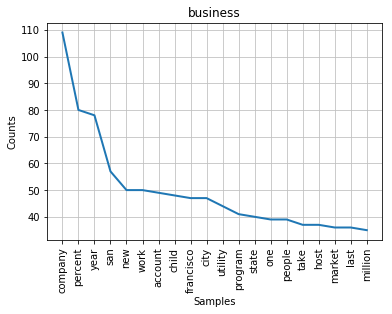

In [16]:
token_plot(final_df, "business")

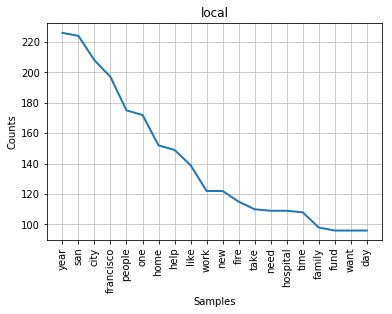

In [17]:
token_plot(final_df, "local")

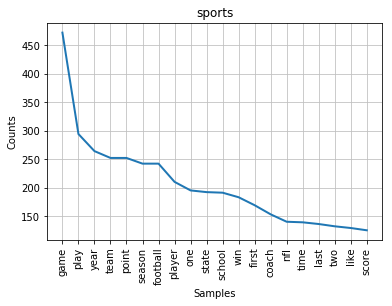

In [18]:
token_plot(final_df, "sports")

***What Topics are being Covered Recently***

As shown by the plot of the tokenized business text, some of the noteworthy words include company, work, San Francisco, market, and million. From this information, we can make an inference that the related topics that business articles are currently talking about have to do with various companies and it seems like they are typically talking about financial aspects of companies. For example, year, market, and million could relate to a companies yearly reports. Since this is a section of business technology, "new" also makes sense since articles can also be talking about new products or services being offered by a company. 

When taking a look at the tokenized local text, some noteworthy words that pop up are year, San Francisco, city, people, help, home, fund, need, and time. Drawing from this, articles seem to be relating to potential needs of the people of San Francisco (since this is local for the Chroncile) due to key words such as help, need, and want. Funds also relates to this since helping in certain areas such as hospitals or such may require funds. Lastly, fire makes sense for the current reports due to the fairly recent gas explosion that occurred in San Francisco (this also relates to home and help).

Finally, for the tokenized sports text, sports seems to be mostly occupied by football articles. In addition to this, articles for all sports typically describe the games with score, plays made in the games, team dynamics, and season logistics. As shown by the frequency of common words, game, play, team, point, season, and score are all present, which does point to this. Interestingly, state and school are more frequent than nfl; therefore, the articles could be mostly about developing talent from schools rather than the actual league itself at this moment. 

***How does the category affect the topic***

The category of the topic affects what the topic typically is. For example, when searching the business category, topics will generally revolve around companies and financial data; however, when searching the sports category, topics will generally revolve around professional or college sports, the games that come from it, and any analysis surrounding those games. 

Taking a look at distributions, the distributions of business and sports are fairly similar in that the first two or three common words are much more common relative to the rest of their common words. When looking at local articles, their common words have a less dramatic downward trend from left to right. This could be explained by how local articles are a much broader topic than sports and business. 

***Limitations***

The preface, these topics of the three categories were hypothesized from finding the most common words present in articles. With this in mind, there will be some obvious limitations that even though there may be a large frequency of a word doesn't necessarily mean that it directly shows what the topics of the category are currently. 